# **Team Banksville**

We decided to judge the best neighborhood by three data sets. 

***Crime data, Citation data & Enrollment Rate Data.***


### *Our Metrics*
Given those data sets we then assigned a weight to each. 

Crime data was given a weight of 100. 

* Crime is a big determining factor. No one wants to live in an area where a large amount of their neighbors are criminals.

Citation data was given a weight of 50. 

* This are less serious offenses, but still offenses

Enrollment data was given a weight of 10. 

* This is a survey data set and not a census data set. Meaning it is a sample of the population. There is also a                  portion of people who could have gave incorrect information or not gave information at all. 

We multiplied each by their weight and then added them together. The neighborhood with the lowest demerit was deemed the best. 

### *Interpreting Data*

1. So with each data set we set them up to be comparable across the board. We used the population to find the per capita ratio. We did this because if we only look at the number of offenses, we completely ignore the fact that **more people = more crime**. 

2. Then we dropped neighborhoods that were excessively "bad" given our metric to focus in on the "good" neighborhoods. We also dropped the neighborhoods with no data. 

3. For the enrollment rate data we took out the college students from our population. We felt it was not neccessary to judge a neighborhood by who decides to go to college or not.

4. Next we dropped the neighborhoods with less than 2,000 people. The average was around 3,400 people. 

5. Now we apply to metric to the remaining neighborhoods and found the best one. 

## *Continue with us to see who won!*

# **The Code**

#### As per usual...

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

#### Adding the data sets

In [2]:
# Pittsburgh Police Arrest Data
pgh_arrest_data = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f",
                           index_col="ARRESTTIME", 
                           parse_dates=True)

#Non-traffic Citations
pgh_citations = pd.read_csv("https://data.wprdc.org/datastore/dump/6b11e87d-1216-463d-bbd3-37460e539d86",
                                index_col="CITEDTIME",
                                parse_dates=True)

# Pittsburgh American Community Survey 2015 - Miscellaneous Data 
pop_data = pd.read_csv("total-population.csv", index_col="Neighborhood")

# Pittsburgh American Community Survey 2015, School Enrollment 
school_enrollment = pd.read_csv('school-enrollment-by-detailed-level-of-school-for-the-population-3-years-and-over.csv', index_col="Neighborhood")

#### Reformatting the data sets to select only the stuff that we need as well as making them look nicer
* Also Renaming some of the collumns to make it more understandable

In [18]:
# Reformat arrest data
pgh_arrest_data = pgh_arrest_data.rename(columns={'INCIDENTNEIGHBORHOOD':'Neighborhood', 'OFFENSES':'Offenses'})
arrest_data = pgh_arrest_data.loc[:,["Offenses","Neighborhood"]].groupby('Neighborhood').count()

# Reformat citation data
pgh_citations = pgh_citations.rename(columns={'NEIGHBORHOOD':'Neighborhood', 'OFFENSES':'Citations'})
citation_data = pgh_citations.loc[:,["Citations","Neighborhood"]].groupby('Neighborhood').count()

# Reformat school data
# Not renaming collumns for this set as it creates a debate on semantics; "can you really call it the total of students if you're including those that aren't in school? What does it mean to be school age?" etc
school_data = school_enrollment.loc[:,["Estimate; Total:", "Estimate; Not enrolled in school"]]

#### Adding Population & Calculating Rates
* Additionally Dropping any NANs

In [19]:
population = pop_data.loc[:,"Estimate; Total"]
citation_data['Estimated Population'] = population
citation_data['Citations per Capita'] = citation_data.loc[:,"Citations"]/citation_data.loc[:,'Estimated Population']
citation_data = citation_data.dropna()

arrest_data['Estimated Population'] = population
arrest_data['Offenses per Capita'] = arrest_data.loc[:,"Offenses"]/arrest_data.loc[:,'Estimated Population']
arrest_data = arrest_data.dropna()

school_data["Ratio not enrolled"] = school_data.loc[:,"Estimate; Not enrolled in school"]/school_data.loc[:,"Estimate; Total:"]
school_data = school_data.dropna()

#### Now lets look at the data

In [5]:
arrest_data.head()

Offenses  Estimated Population  Offenses per Capita
Neighborhood                                                          
Allegheny Center        672                1411.0             0.476258
Allegheny West           76                 343.0             0.221574
Allentown               550                2558.0             0.215012
Arlington               169                1852.0             0.091253
Arlington Heights       101                 272.0             0.371324

In [6]:
citation_data.head()

Citations  Estimated Population  Citations per Capita
Neighborhood                                                            
Allegheny Center         118                1411.0              0.083629
Allegheny West            12                 343.0              0.034985
Allentown                 91                2558.0              0.035575
Arlington                 37                1852.0              0.019978
Arlington Heights          5                 272.0              0.018382

In [7]:
school_data.head()

Estimate; Total:  Estimate; Not enrolled in school  \
Neighborhood                                                            
Allegheny Center             1389.0                             995.0   
Allegheny West                343.0                             282.0   
Allentown                    2520.0                            1555.0   
Arlington                    1823.0                            1396.0   
Arlington Heights             213.0                             173.0   

                   Ratio not enrolled  
Neighborhood                           
Allegheny Center             0.716343  
Allegheny West               0.822157  
Allentown                    0.617063  
Arlington                    0.765771  
Arlington Heights            0.812207

Text(0,0.5,'Crime per Capita')

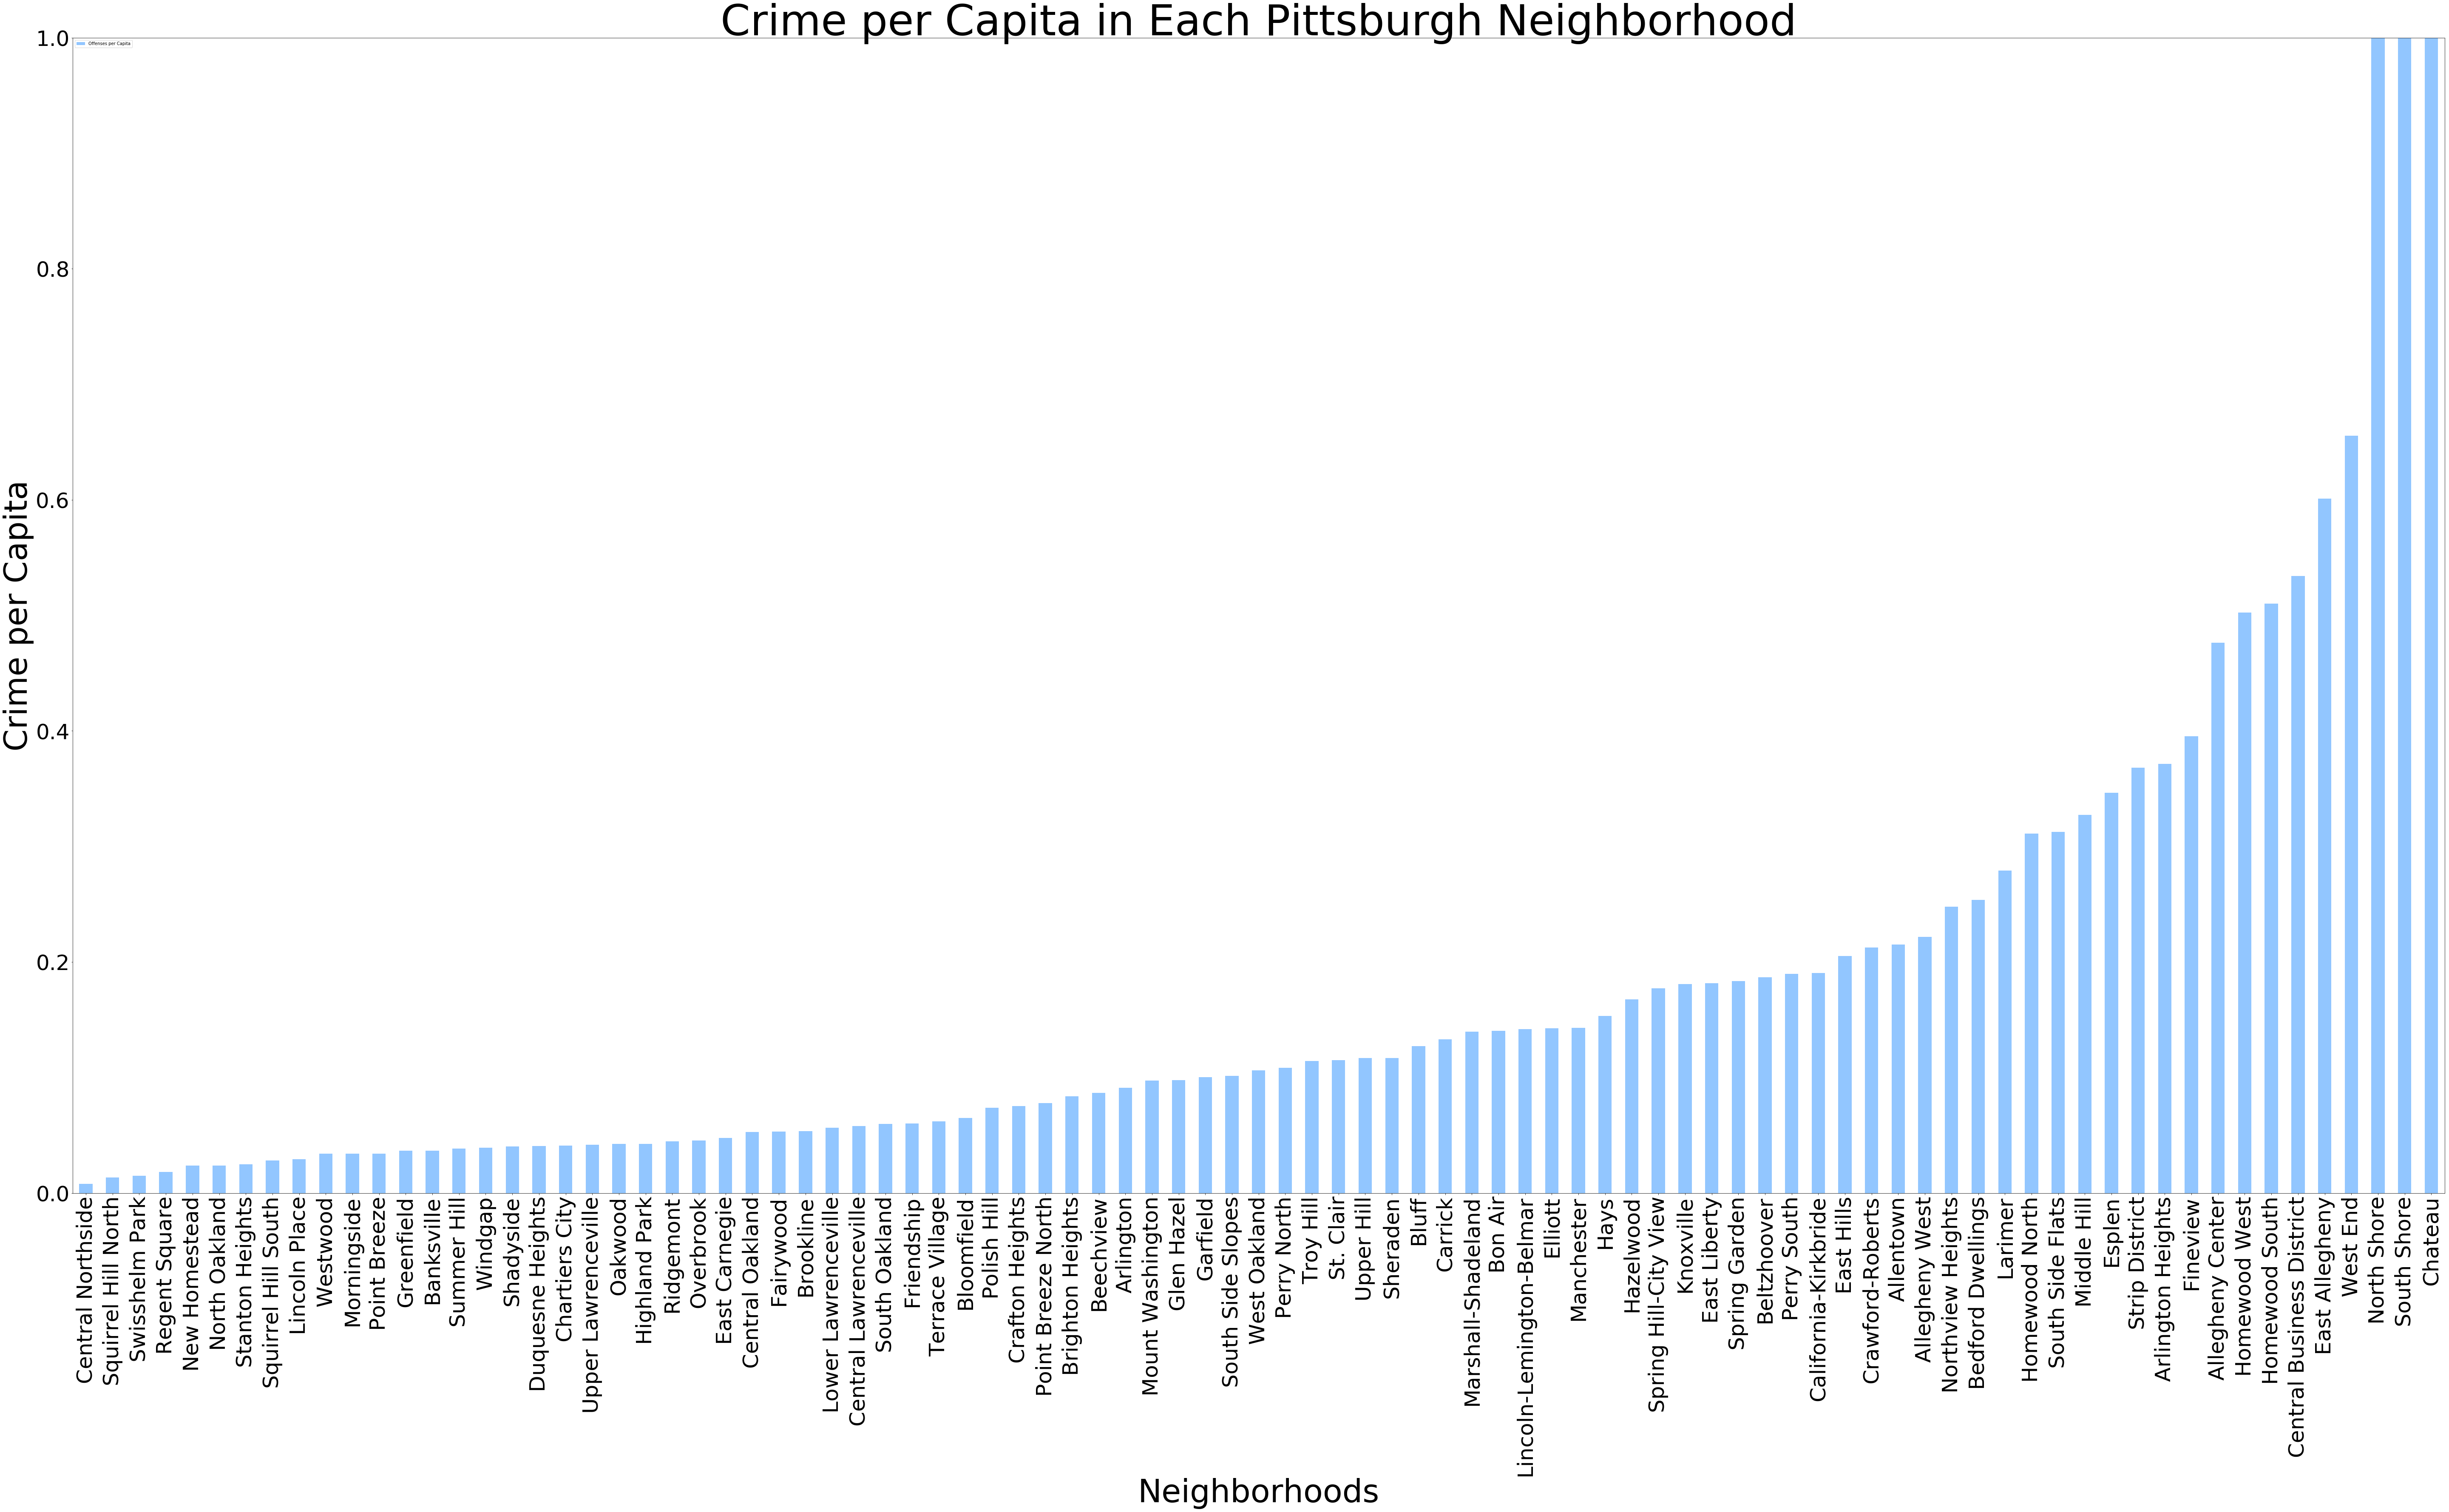

In [13]:
#Changing the style to something nicer
plt.style.use('seaborn-pastel')

arrest_data.loc[:,["Offenses per Capita"]].sort_values(by=['Offenses per Capita'], ascending=True).plot(kind='bar', fontsize =50, ylim = (0,1), figsize=(100,50))
plt.title("Crime per Capita in Each Pittsburgh Neighborhood", fontsize =100)
plt.xlabel("Neighborhoods", fontsize =75)
plt.ylabel("Crime per Capita", fontsize =75)

Text(0,0.5,'Citations per Capita')

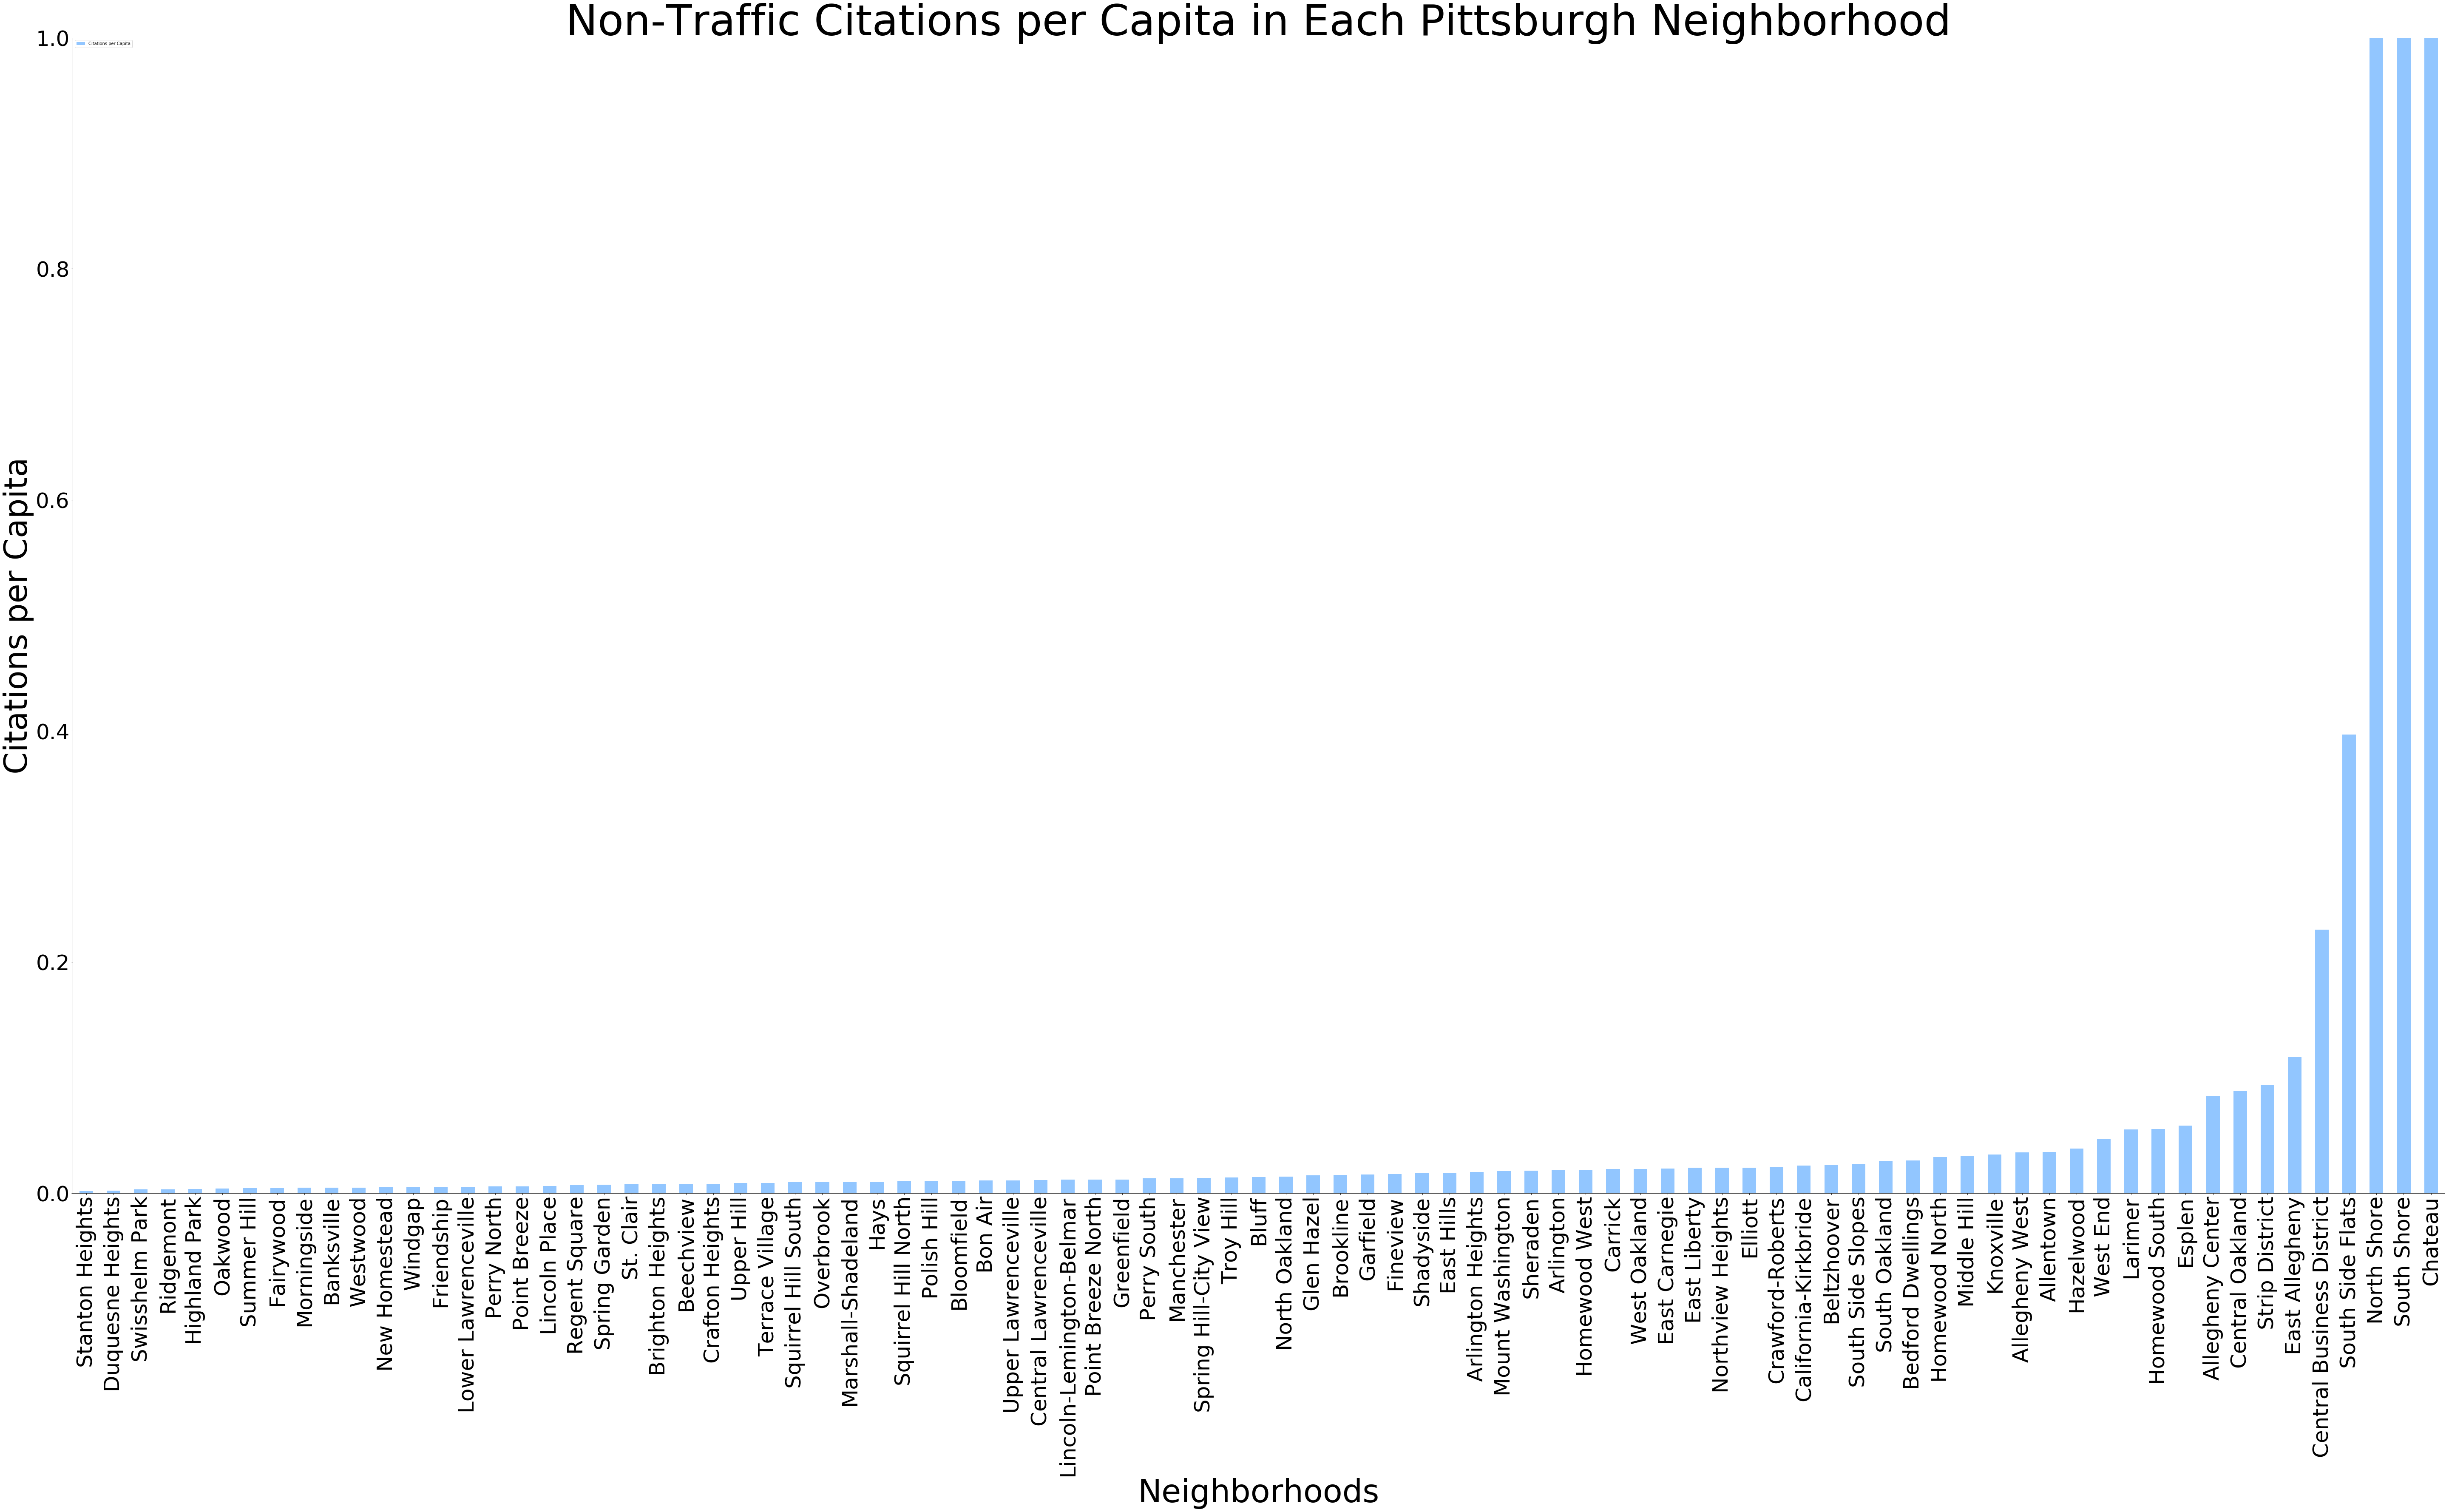

In [15]:
citation_data.loc[:,["Citations per Capita"]].sort_values(by=['Citations per Capita'], ascending=True).plot(kind='bar', fontsize =50, ylim = (0,1), figsize=(100,50))
plt.title("Non-Traffic Citations per Capita in Each Pittsburgh Neighborhood", fontsize =100)
plt.xlabel("Neighborhoods", fontsize =75)
plt.ylabel("Citations per Capita", fontsize =75)

Text(0,0.5,'Ratio Unenrolled')

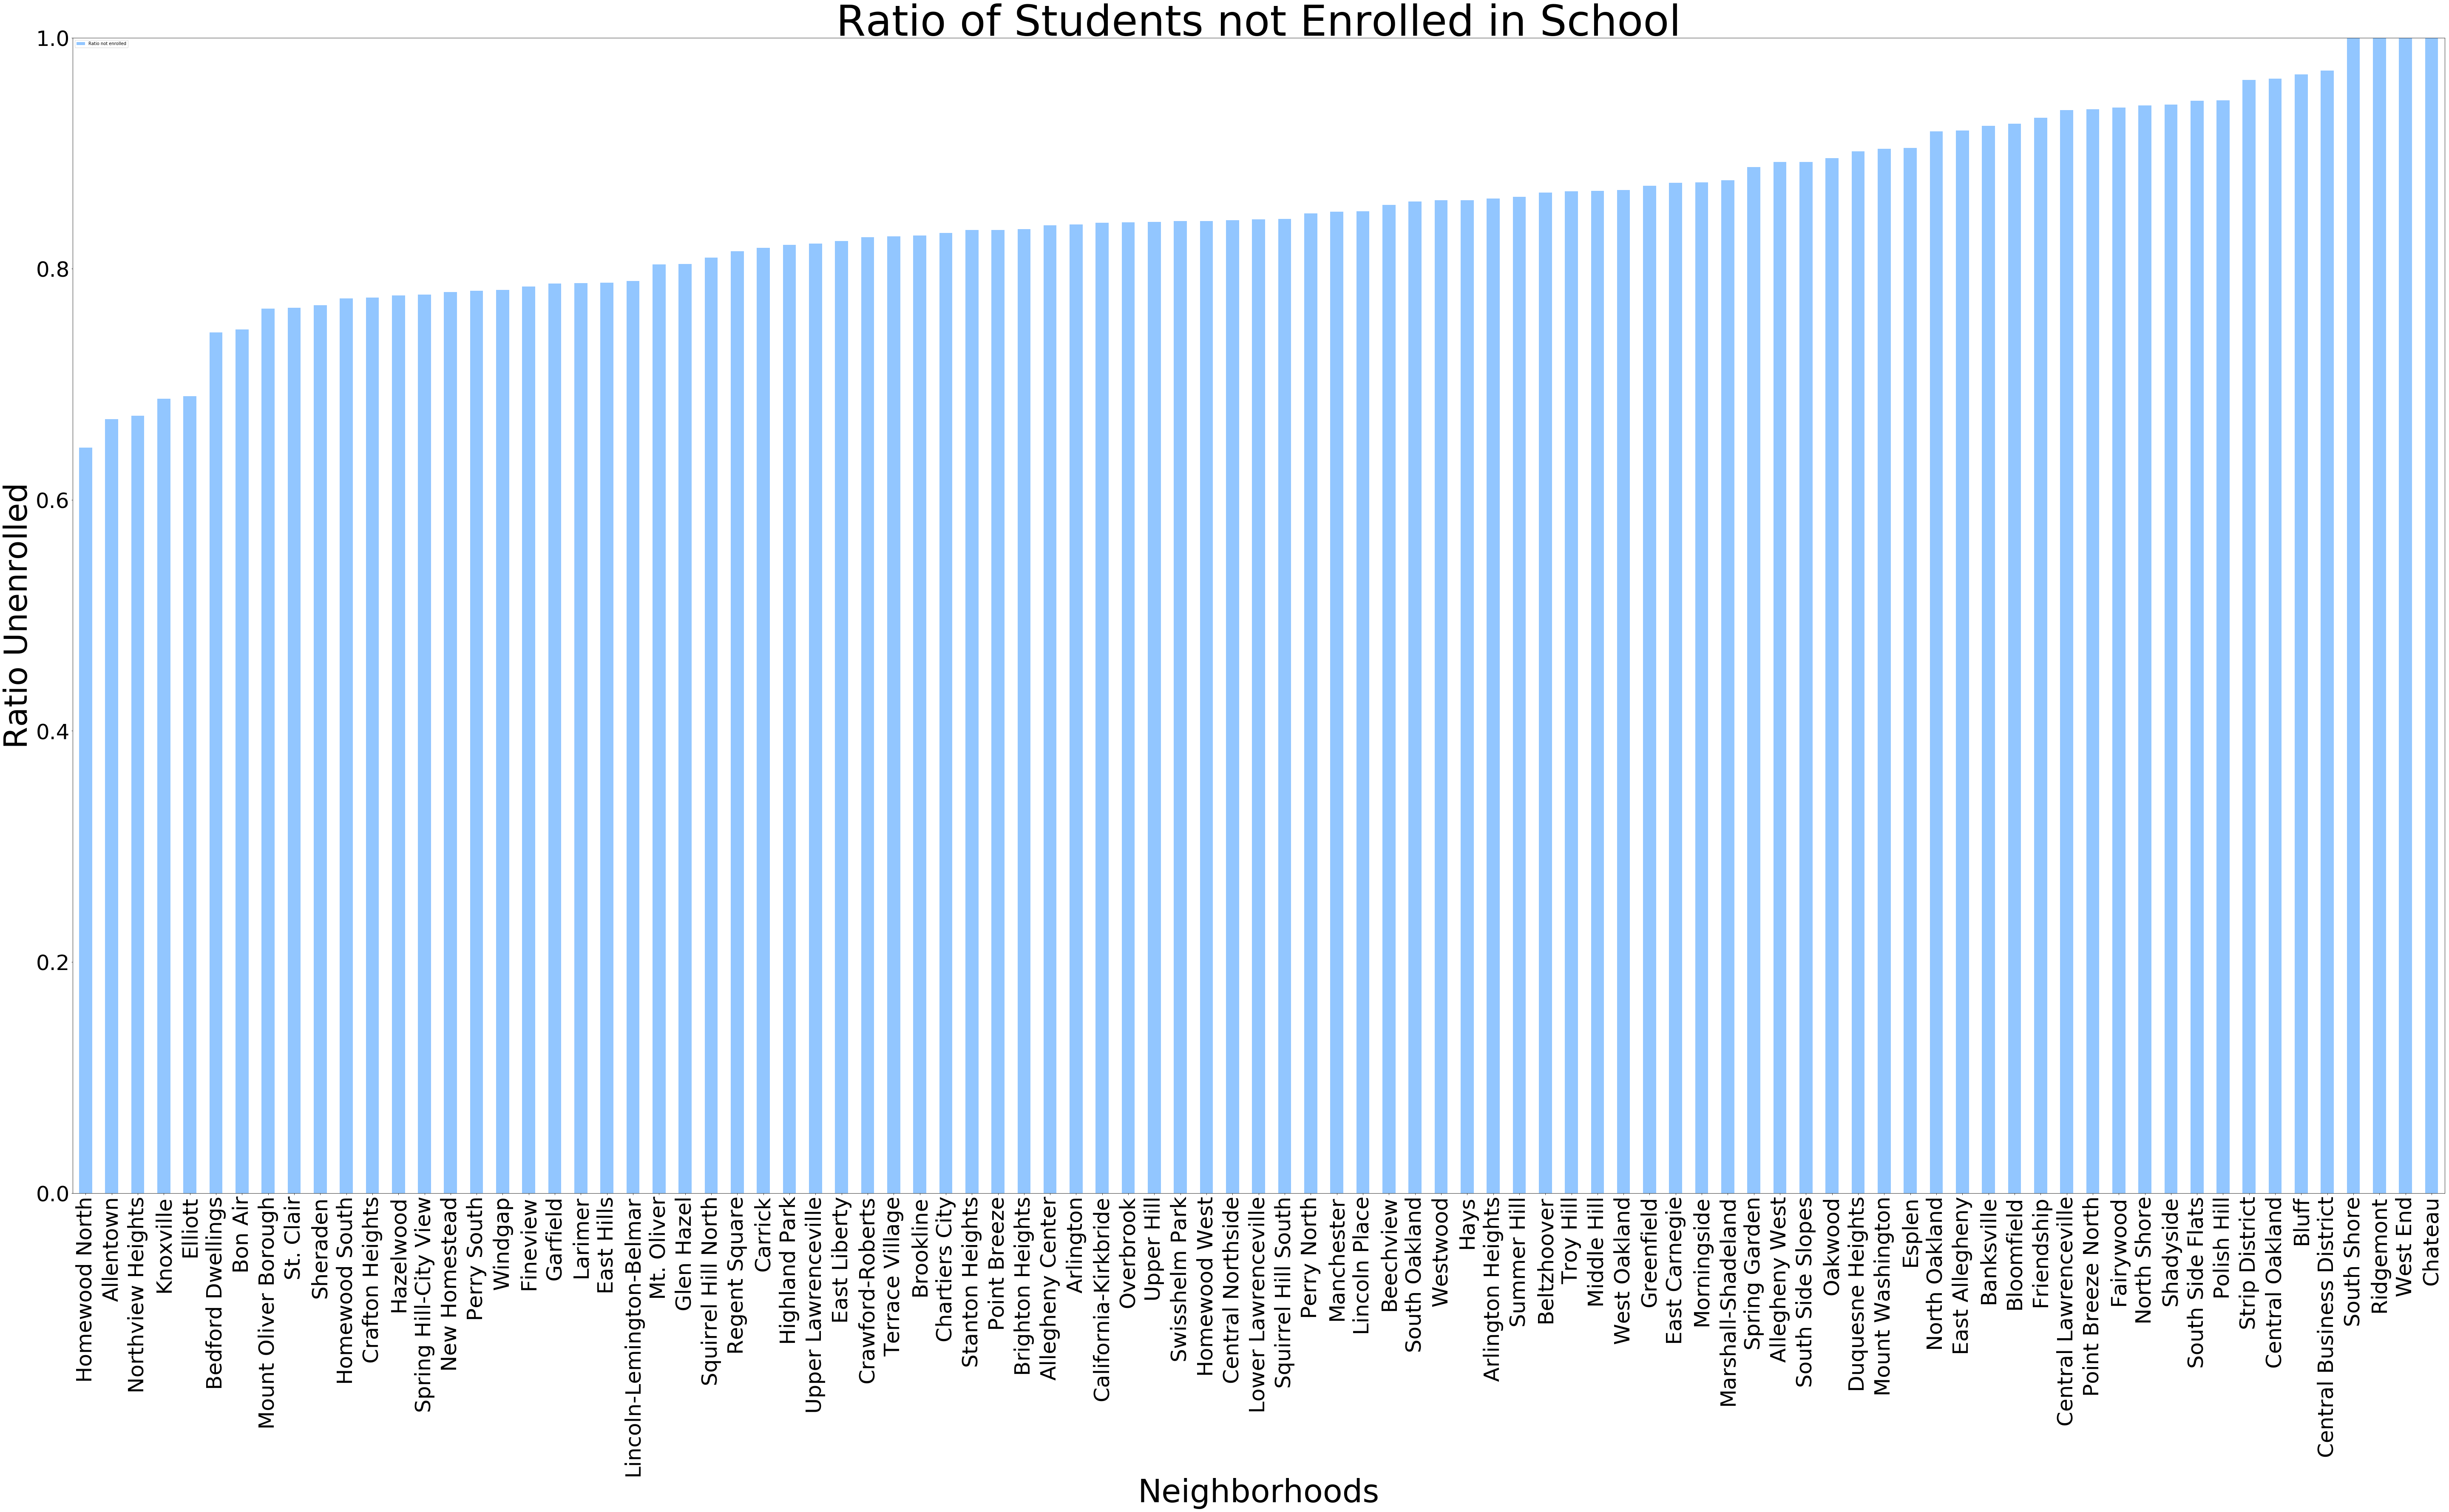

In [16]:
school_data.loc[:,["Ratio not enrolled"]].sort_values(by=['Ratio not enrolled'], ascending=True).plot(kind='bar', fontsize =50, ylim = (0,1), figsize=(100,50))
plt.title("Ratio of Students not Enrolled in School", fontsize =100)
plt.xlabel("Neighborhoods", fontsize =75)
plt.ylabel("Ratio Unenrolled", fontsize =75)

#### Alright, so the school data is kind of biased in favor of neighborhoods that contain a college, so let's get rid of the college students

In [9]:
#Removing college age students and recalculating
new_school_data = school_data
new_school_data["Estimate; Total:"] = school_data.loc[:,"Estimate; Total:"]-school_enrollment.loc[:,"Estimate; Enrolled in school: - Graduate or professional school"]
new_school_data["Estimate; Total:"] = school_data.loc[:,"Estimate; Total:"]-school_enrollment.loc[:,"Estimate; Enrolled in school: - Enrolled in college, undergraduate years"]
new_school_data["Ratio not enrolled"] = new_school_data.loc[:,"Estimate; Not enrolled in school"]/school_data.loc[:,"Estimate; Total:"]
new_school_data = new_school_data.dropna()

Text(0,0.5,'Ratio Unenrolled')

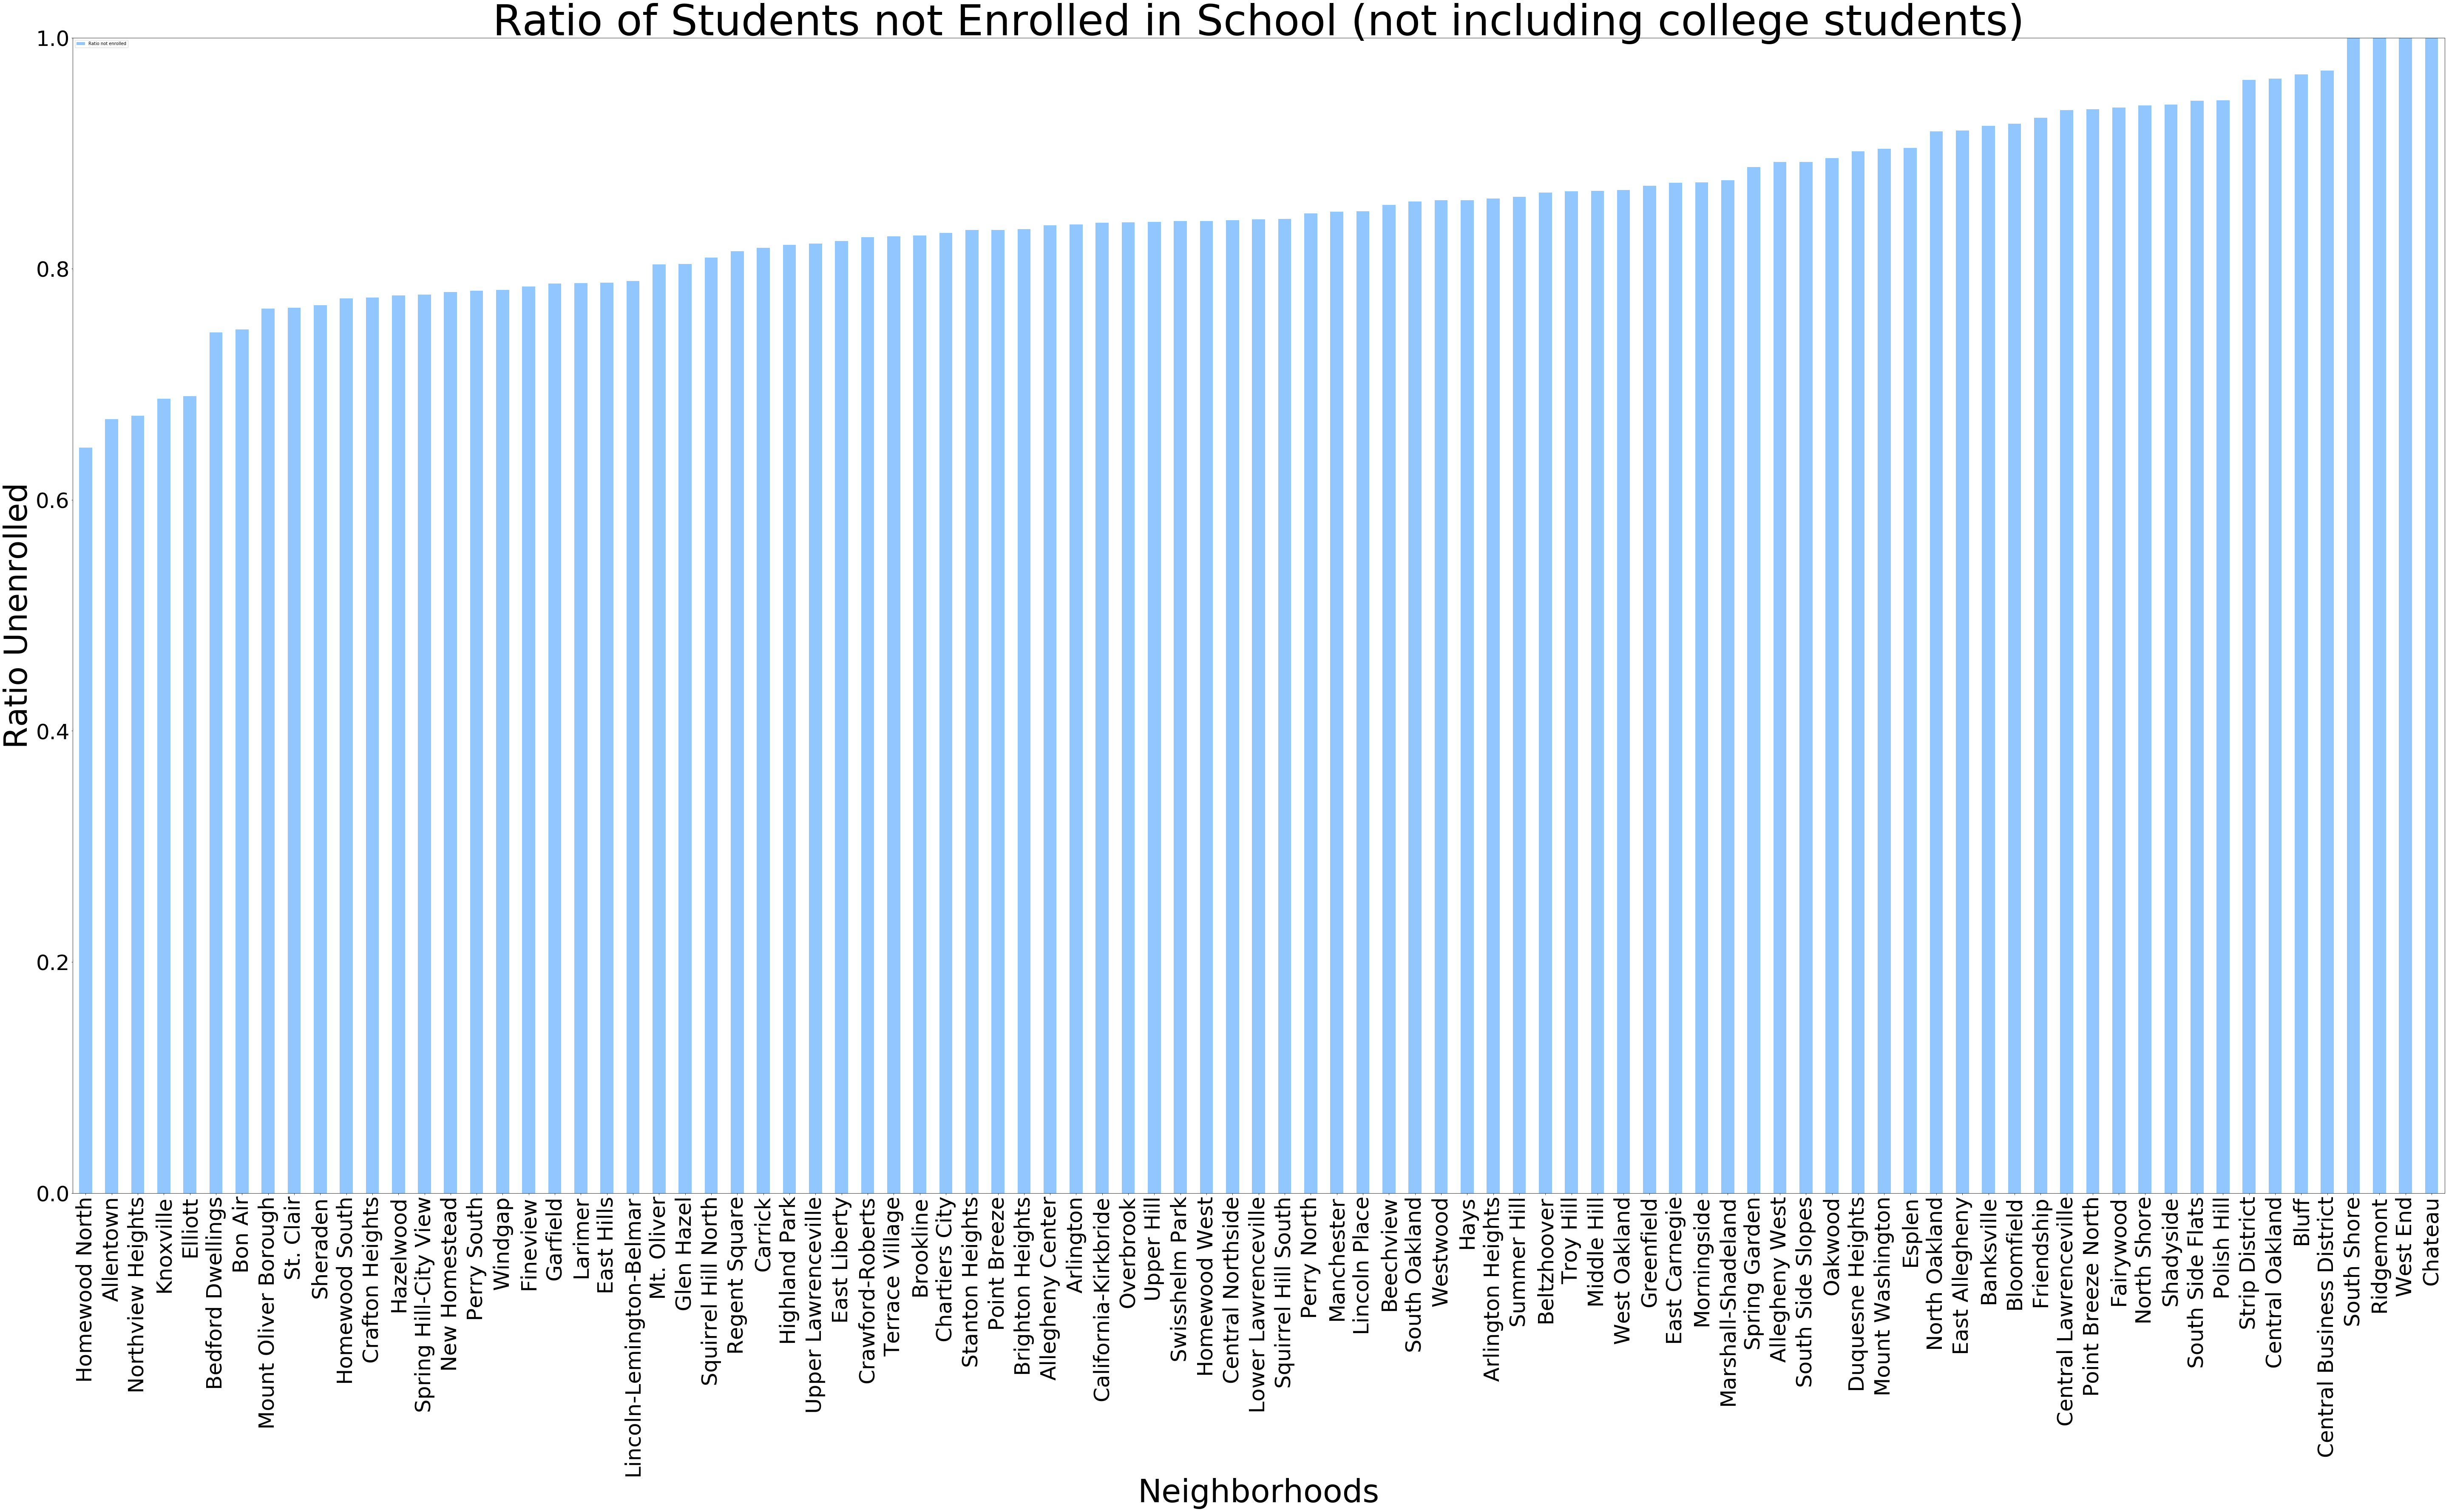

In [17]:
new_school_data.loc[:,["Ratio not enrolled"]].sort_values(by=['Ratio not enrolled'], ascending=True).plot(kind='bar', fontsize =50, ylim = (0,1), figsize=(100,50))
plt.title("Ratio of Students not Enrolled in School (not including college students)", fontsize =100)
plt.xlabel("Neighborhoods", fontsize =75)
plt.ylabel("Ratio Unenrolled", fontsize =75)

#### Now lets remove places with low population

In [10]:
arrest_data_filtered = arrest_data[arrest_data['Estimated Population']>2000].sort_values("Offenses per Capita")
citation_data_filtered = citation_data[citation_data['Estimated Population']>2000].sort_values("Citations per Capita")
school_data_filtered = new_school_data[new_school_data['Estimate; Total:']>2000].sort_values("Ratio not enrolled")

Text(0,0.5,'Crime per Capita')

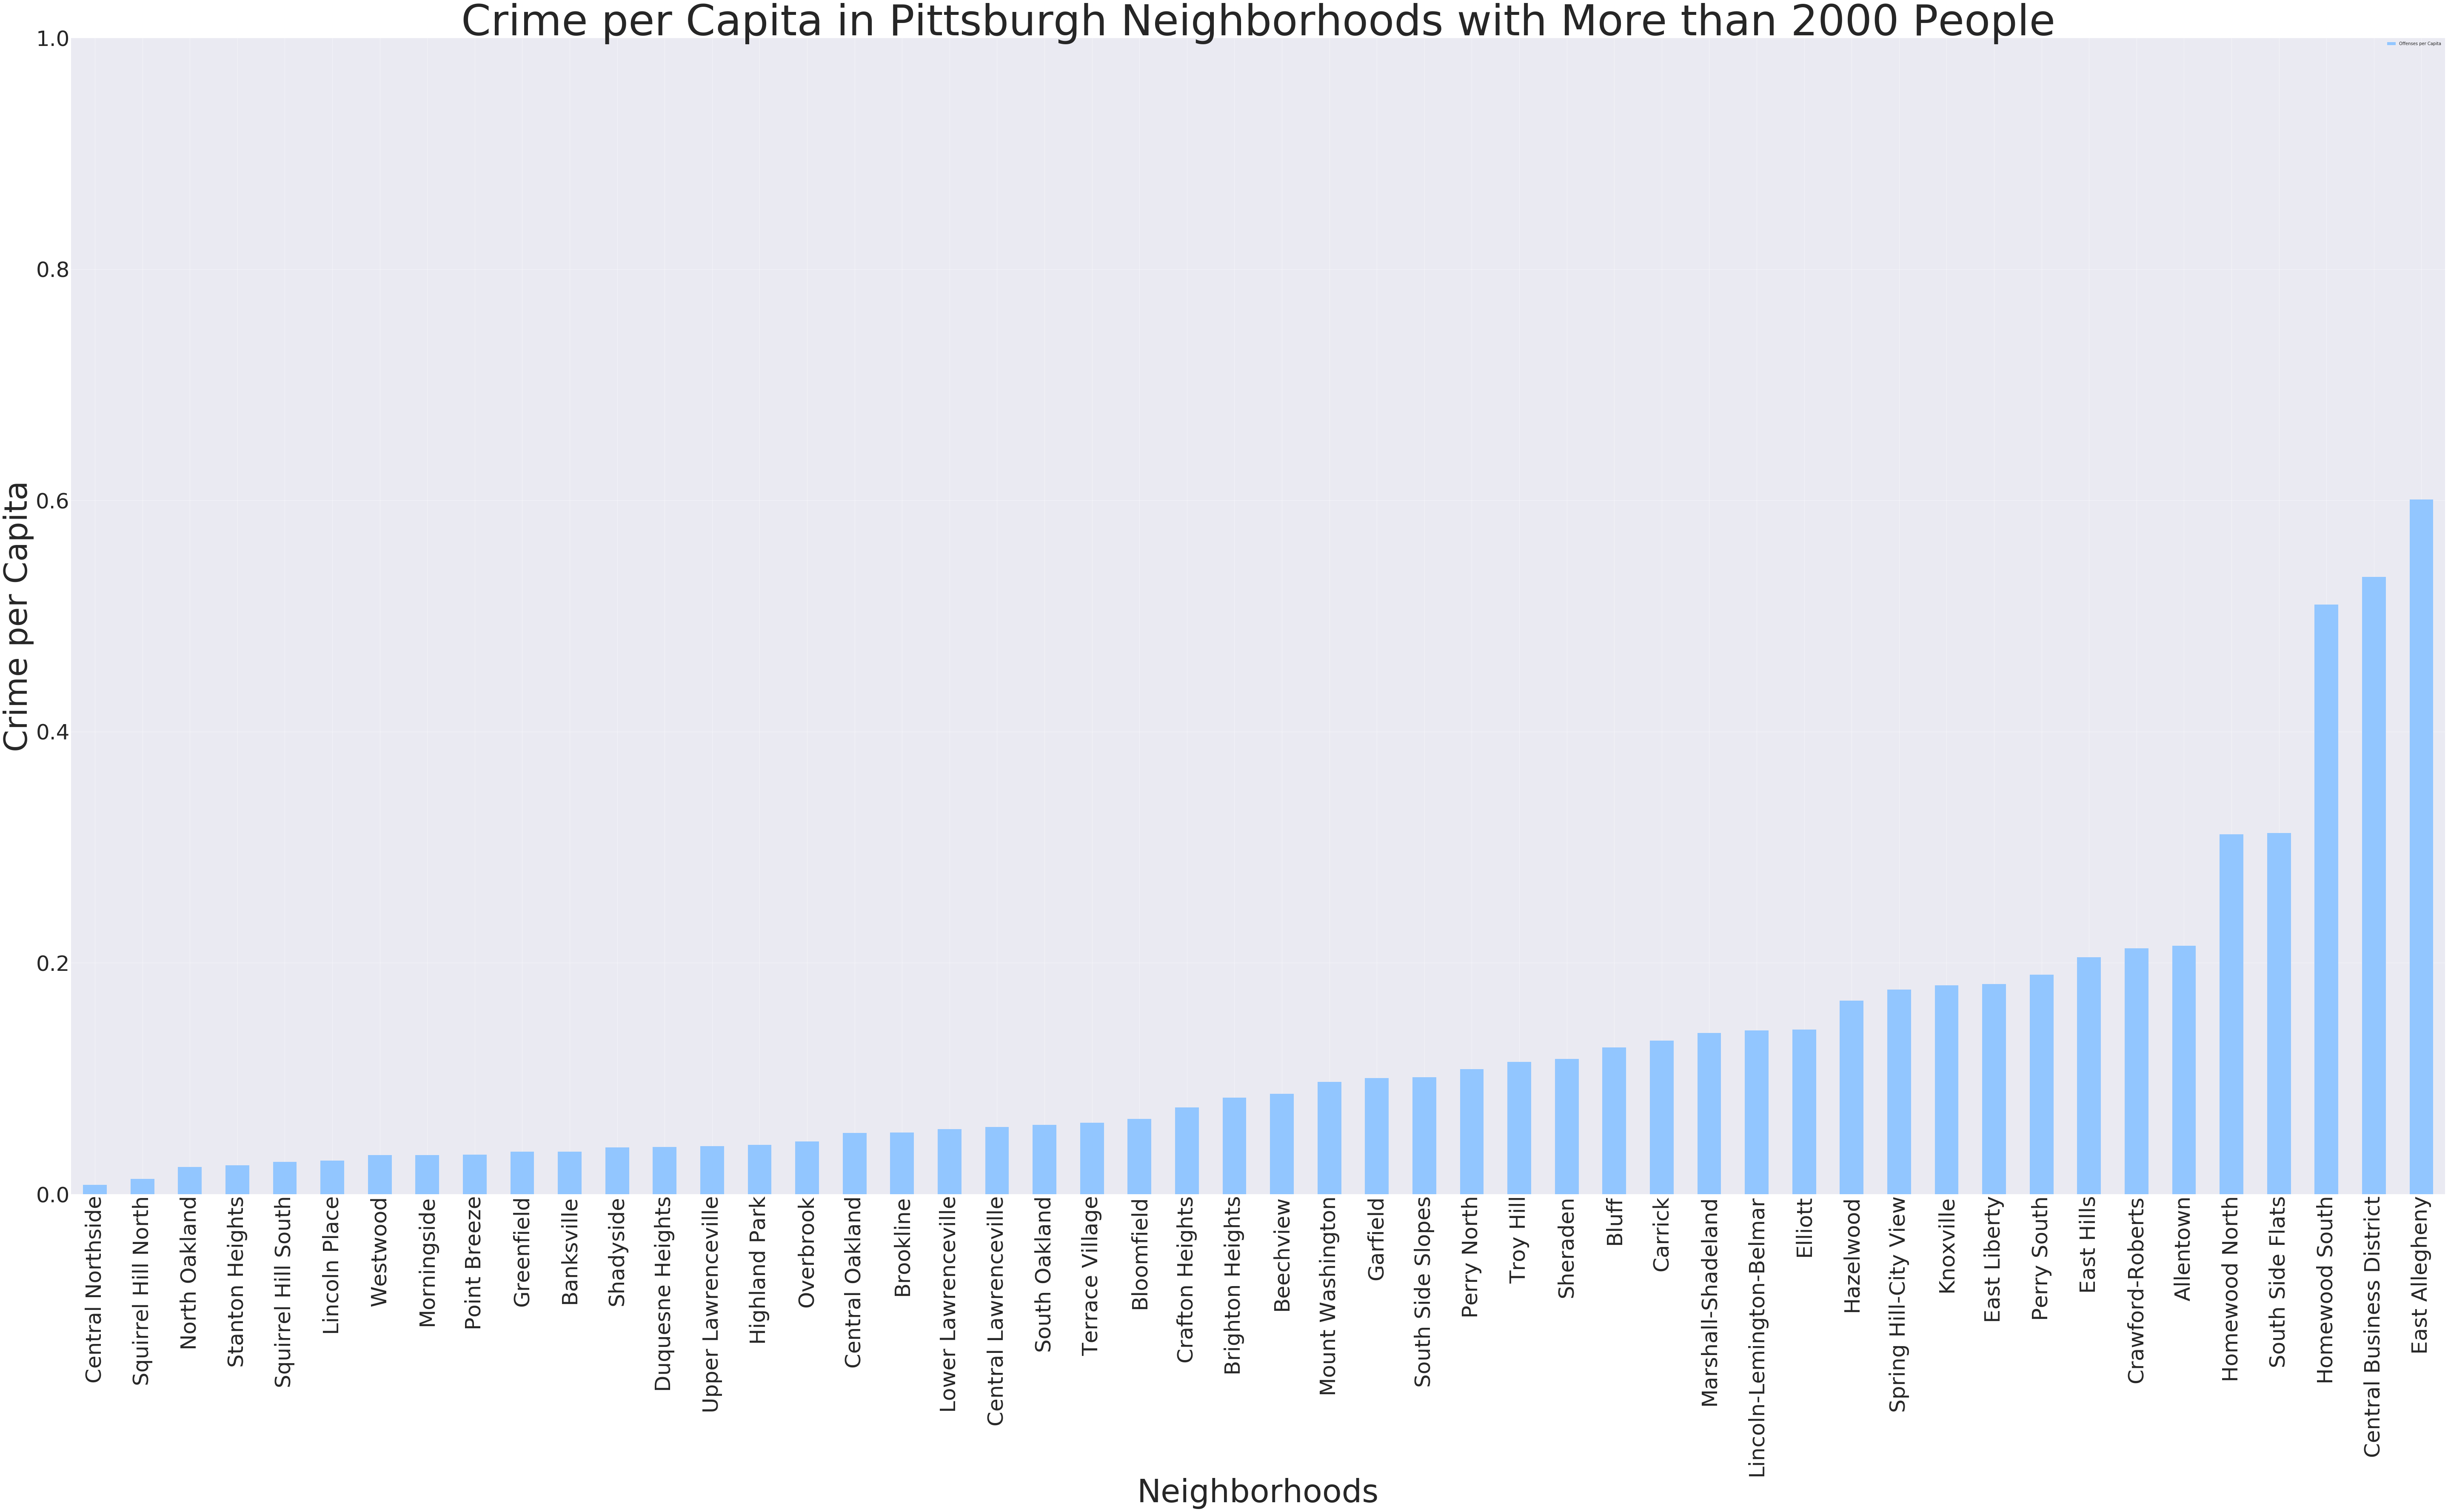

In [39]:
arrest_data_filtered.loc[:,["Offenses per Capita"]].sort_values(by=['Offenses per Capita'], ascending=True).plot(kind='bar', fontsize =50, ylim = (0,1), figsize=(100,50))
plt.title("Crime per Capita in Pittsburgh Neighborhoods with More than 2000 People", fontsize =100)
plt.xlabel("Neighborhoods", fontsize =75)
plt.ylabel("Crime per Capita", fontsize =75)

Text(0,0.5,'Citations per Capita')

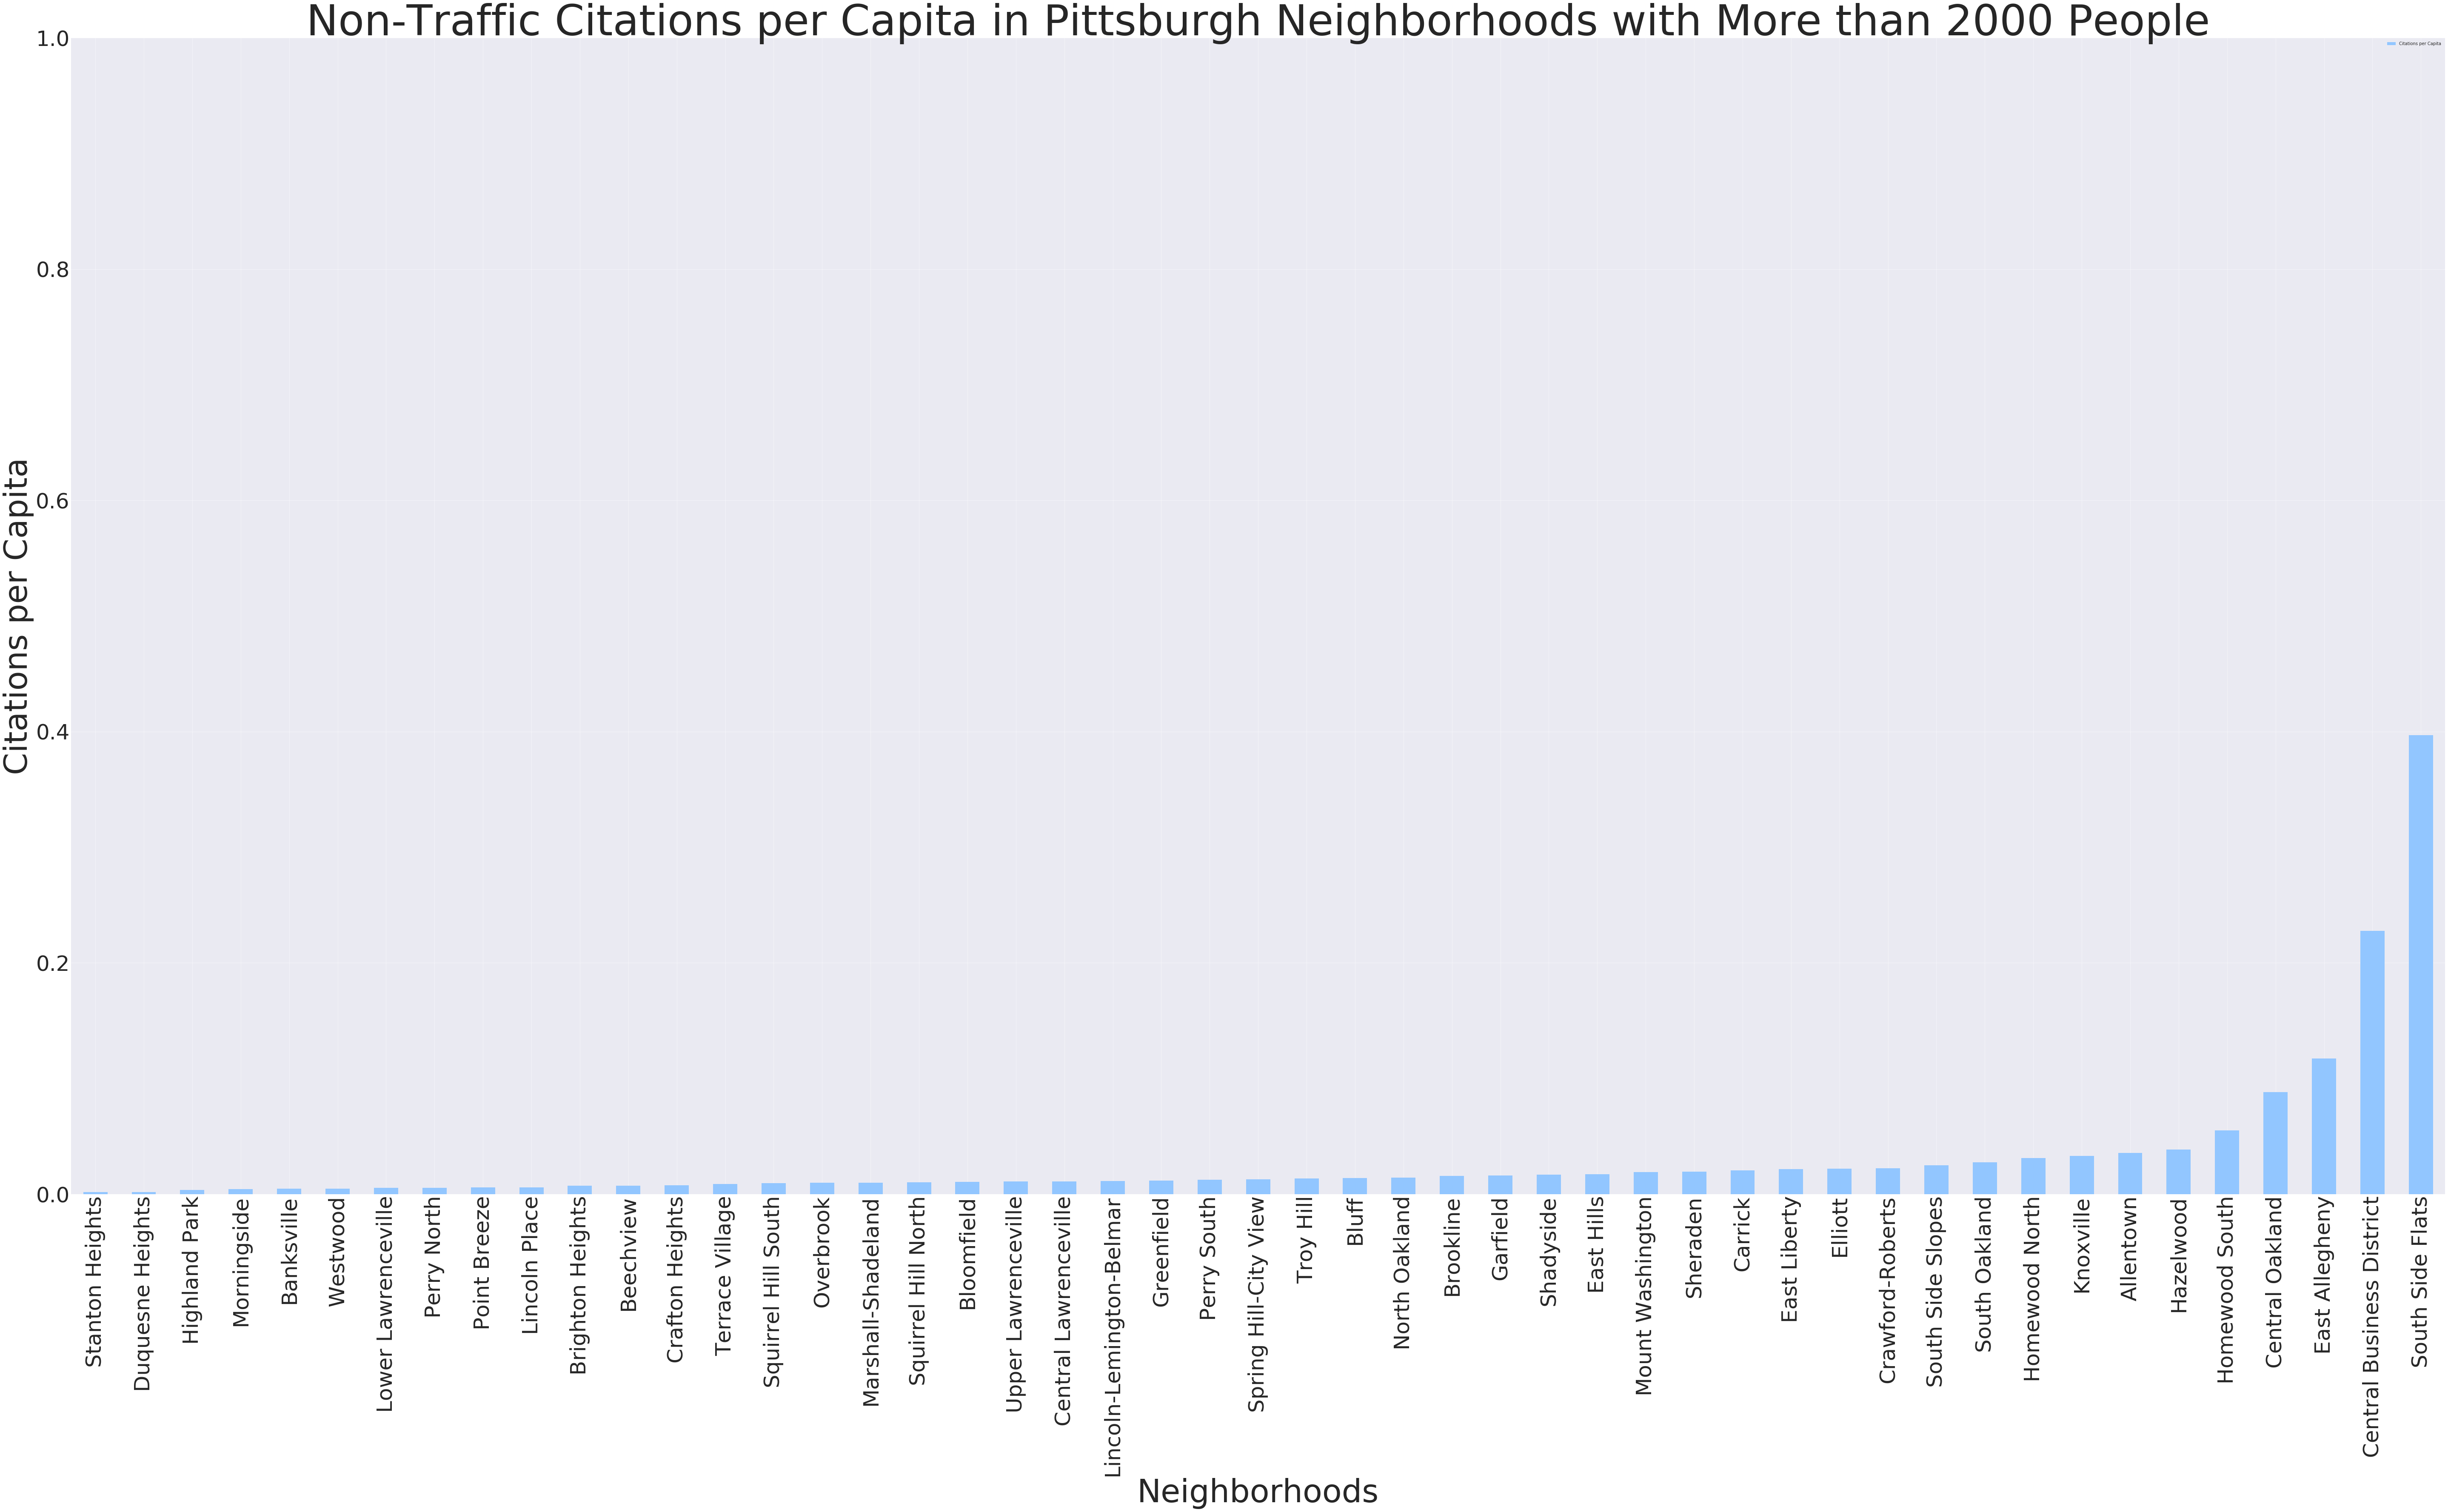

In [40]:
citation_data_filtered.loc[:,["Citations per Capita"]].sort_values(by=['Citations per Capita'], ascending=True).plot(kind='bar', fontsize =50, ylim = (0,1), figsize=(100,50))
plt.title("Non-Traffic Citations per Capita in Pittsburgh Neighborhoods with More than 2000 People", fontsize =100)
plt.xlabel("Neighborhoods", fontsize =75)
plt.ylabel("Citations per Capita", fontsize =75)

Text(0,0.5,'Ratio Unenrolled')

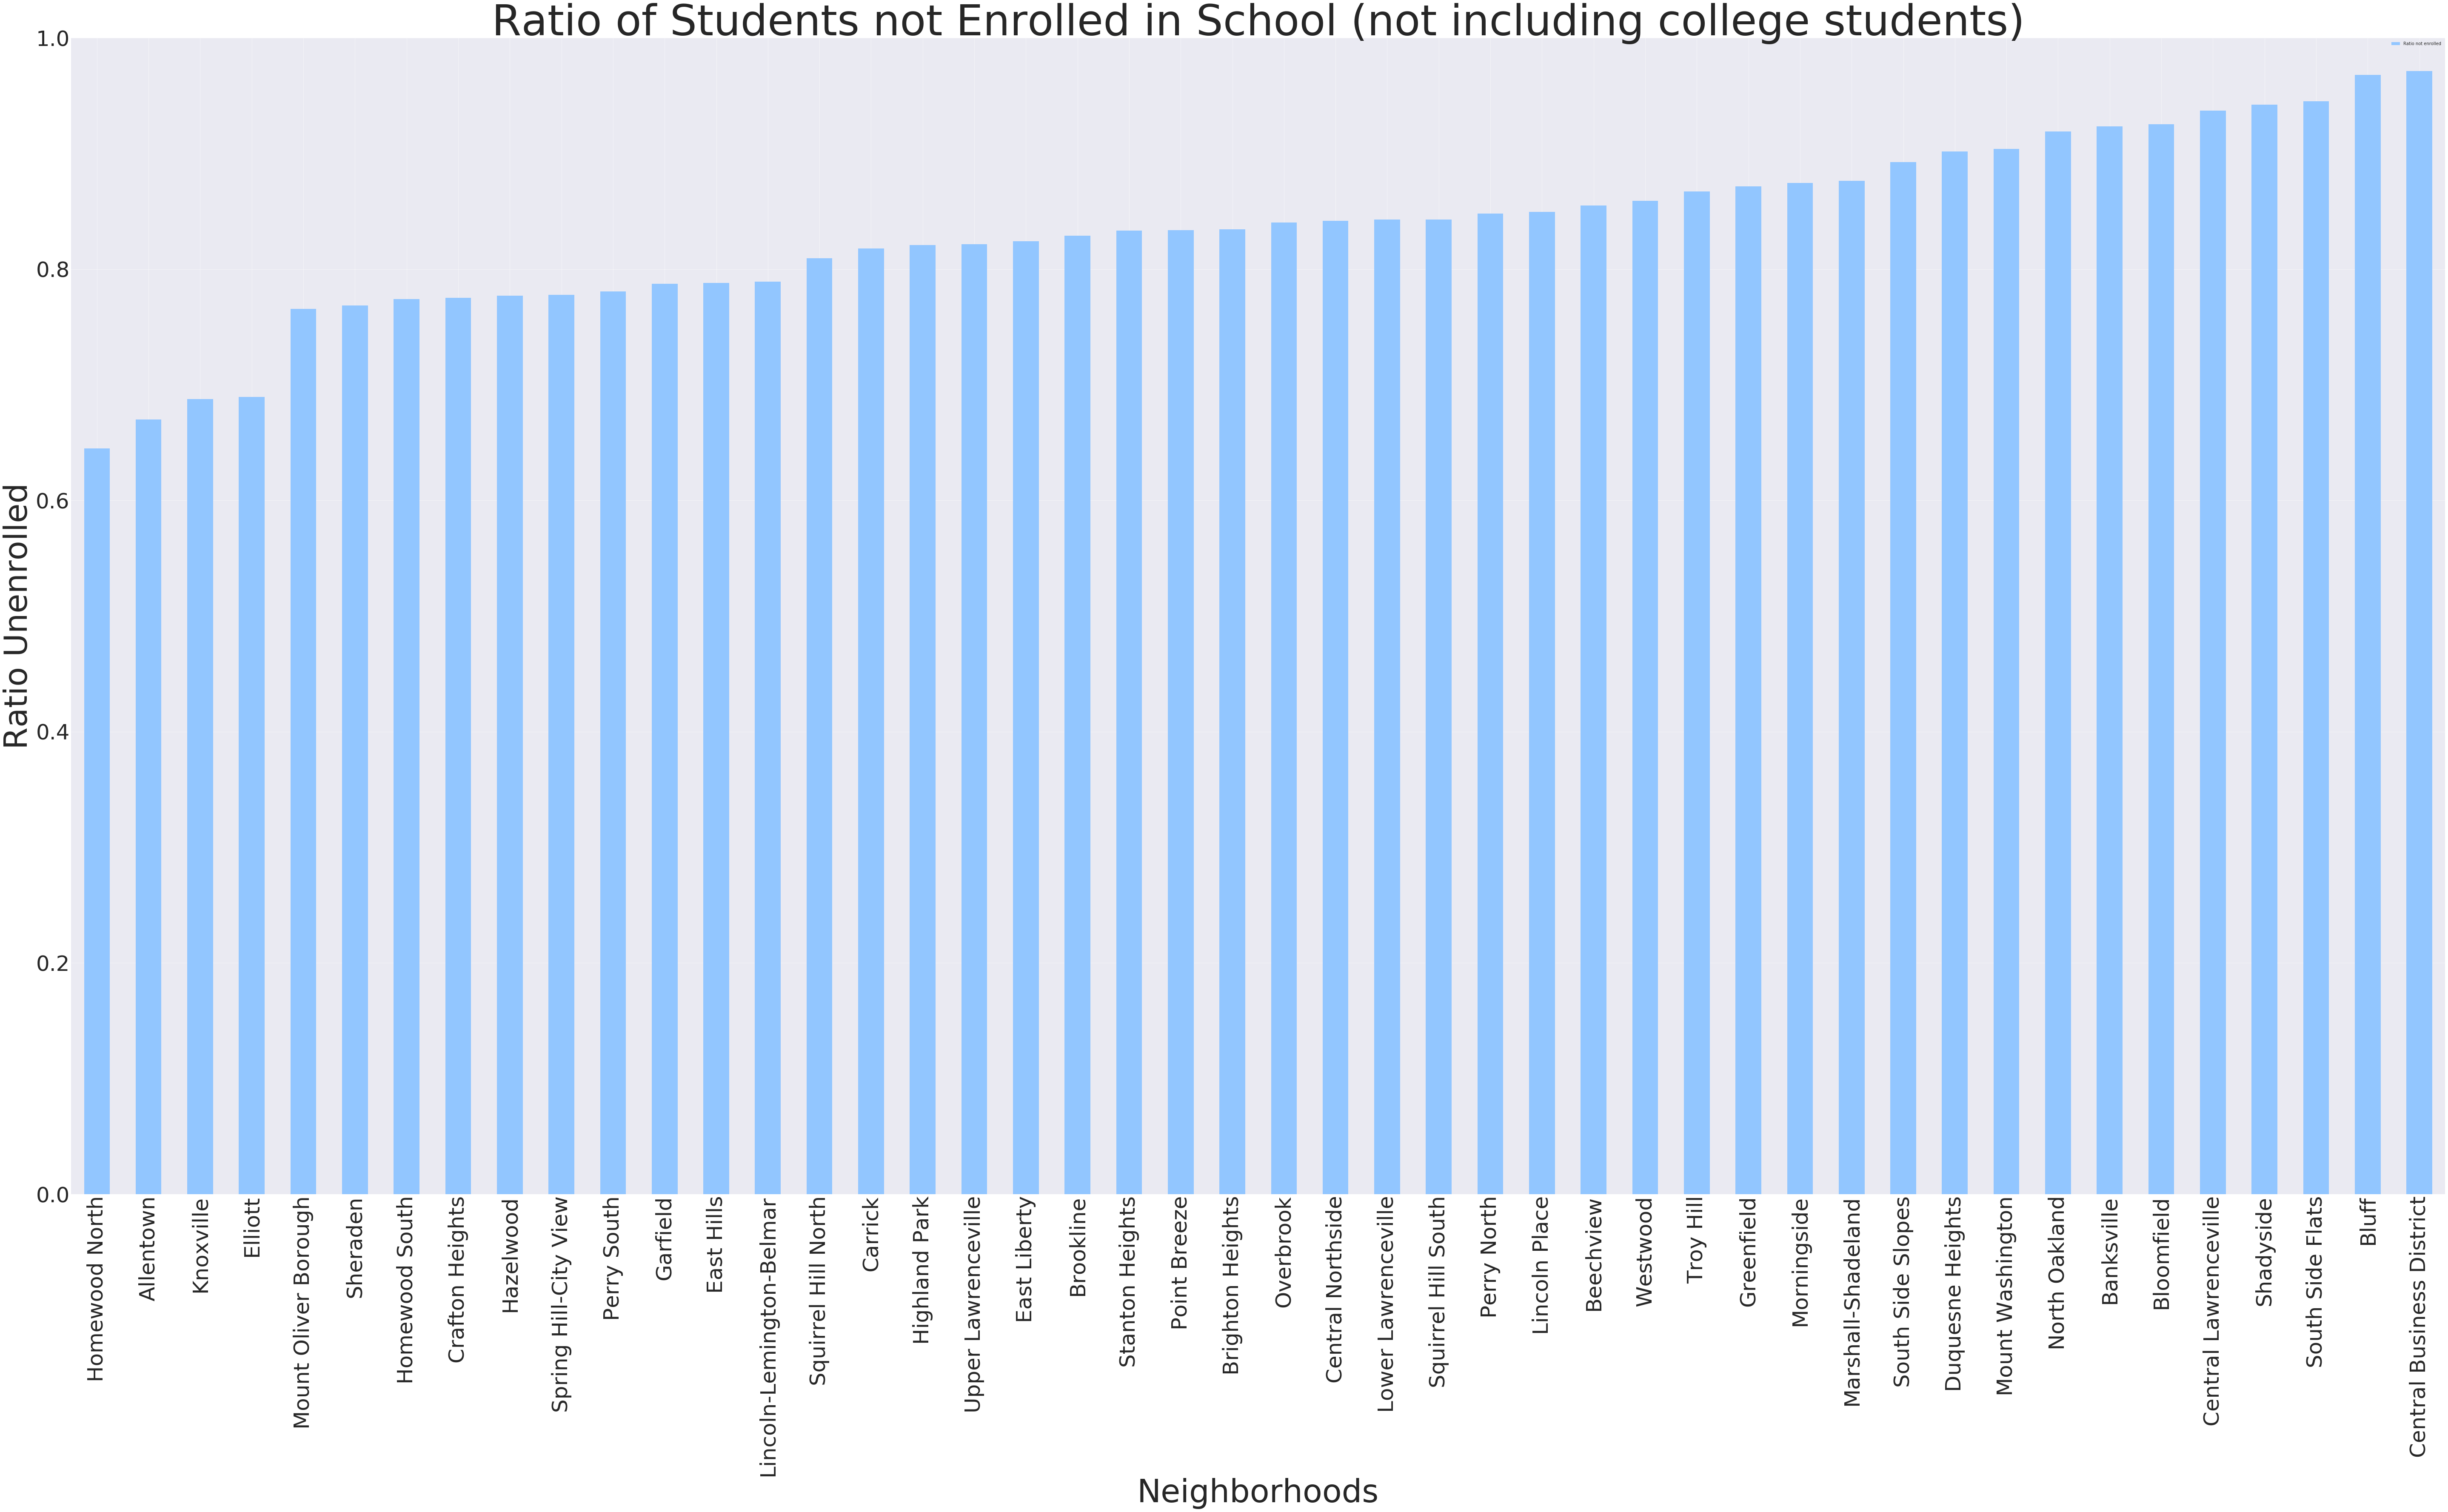

In [21]:
school_data_filtered.loc[:,["Ratio not enrolled"]].sort_values(by=['Ratio not enrolled'], ascending=True).plot(kind='bar', fontsize =50, ylim = (0,1), figsize=(100,50))
plt.title("Ratio of Students not Enrolled in School", fontsize =100)
plt.xlabel("Neighborhoods", fontsize =75)
plt.ylabel("Ratio Unenrolled", fontsize =75)

#### Let's combine our metrics into one data frame (One that still includes the neighborhoods that don't meet our population standard and one that takes into account population) as well as add on our weight measurement

In [11]:
combined = pd.concat([arrest_data, citation_data.loc[:,['Citations','Citations per Capita']],new_school_data], axis=1, sort=True)
combined = combined.dropna()
combined['Measure of Worst'] = 100*combined.loc[:,"Offenses per Capita"]+50*combined.loc[:,"Citations per Capita"]+10*combined.loc[:,"Ratio not enrolled"]
combined = combined.sort_values(by=['Measure of Worst'], ascending=True)

combined_filtered = pd.concat([arrest_data_filtered, citation_data_filtered.loc[:,['Citations','Citations per Capita']],school_data_filtered], axis=1, sort=True)
combined_filtered = combined_filtered.dropna()
combined_filtered['Measure of Worst'] = 100*combined_filtered.loc[:,"Offenses per Capita"]+50*combined_filtered.loc[:,"Citations per Capita"]+10*combined_filtered.loc[:,"Ratio not enrolled"]
combined_filtered.sort_values(by=['Measure of Worst'], ascending=True)

Offenses  Estimated Population  \
Squirrel Hill North           152.0               11336.0   
Stanton Heights               119.0                4761.0   
Squirrel Hill South           449.0               16042.0   
Lincoln Place                 102.0                3499.0   
Point Breeze                  185.0                5414.0   
Westwood                      120.0                3537.0   
North Oakland                 227.0                9602.0   
Morningside                   111.0                3262.0   
Highland Park                 290.0                6810.0   
Upper Lawrenceville           115.0                2754.0   
Greenfield                    282.0                7690.0   
Banksville                    142.0                3858.0   
Duquesne Heights              103.0                2522.0   
Overbrook                     168.0                3682.0   
Shadyside                     549.0               13562.0   
Lower Lawrenceville           145.0                2572.0   
Brookline                     703.0               13160.0   
Crafton Heights               298.0                3964.0   
Central Lawrenceville         277.0                4775.0   
Bloomfield                    564.0                8669.0   
Brighton Heights              620.0                7421.0   
Beechview                     701.0                8078.0   
Garfield                      398.0                3966.0   
Perry North                   408.0                3771.0   
Mount Washington              850.0                8743.0   
South Side Slopes             464.0                4583.0   
Sheraden                      665.0                5684.0   
Troy Hill                     261.0                2283.0   
Elliott                       355.0                2491.0   
Carrick                      1346.0               10122.0   
Lincoln-Lemington-Belmar      702.0                4955.0   
Bluff                         800.0                6294.0   
Marshall-Shadeland            864.0                6195.0   
Spring Hill-City View         435.0                2456.0   
Hazelwood                     713.0                4257.0   
Knoxville                     769.0                4255.0   
Perry South                   645.0                3398.0   
East Liberty                 1006.0                5537.0   
East Hills                    586.0                2859.0   
Allentown                     550.0                2558.0   
Homewood North               1049.0                3371.0   
South Side Flats             1966.0                6292.0   
Homewood South               1161.0                2276.0   
Central Business District    2168.0                4060.0   

                           Offenses per Capita  Citations  \
Squirrel Hill North                   0.013409      118.0   
Stanton Heights                       0.024995        8.0   
Squirrel Hill South                   0.027989      154.0   
Lincoln Place                         0.029151       21.0   
Point Breeze                          0.034171       32.0   
Westwood                              0.033927       17.0   
North Oakland                         0.023641      137.0   
Morningside                           0.034028       15.0   
Highland Park                         0.042584       25.0   
Upper Lawrenceville                   0.041757       30.0   
Greenfield                            0.036671       90.0   
Banksville                            0.036807       18.0   
Duquesne Heights                      0.040841        5.0   
Overbrook                             0.045627       36.0   
Shadyside                             0.040481      230.0   
Lower Lawrenceville                   0.056376       14.0   
Brookline                             0.053419      207.0   
Crafton Heights                       0.075177       31.0   
Central Lawrenceville                 0.058010       53.0   
Bloomfield                            0.065059       92.0   


#### Time to see the top ten

Text(0,0.5,'Measure of Worst')

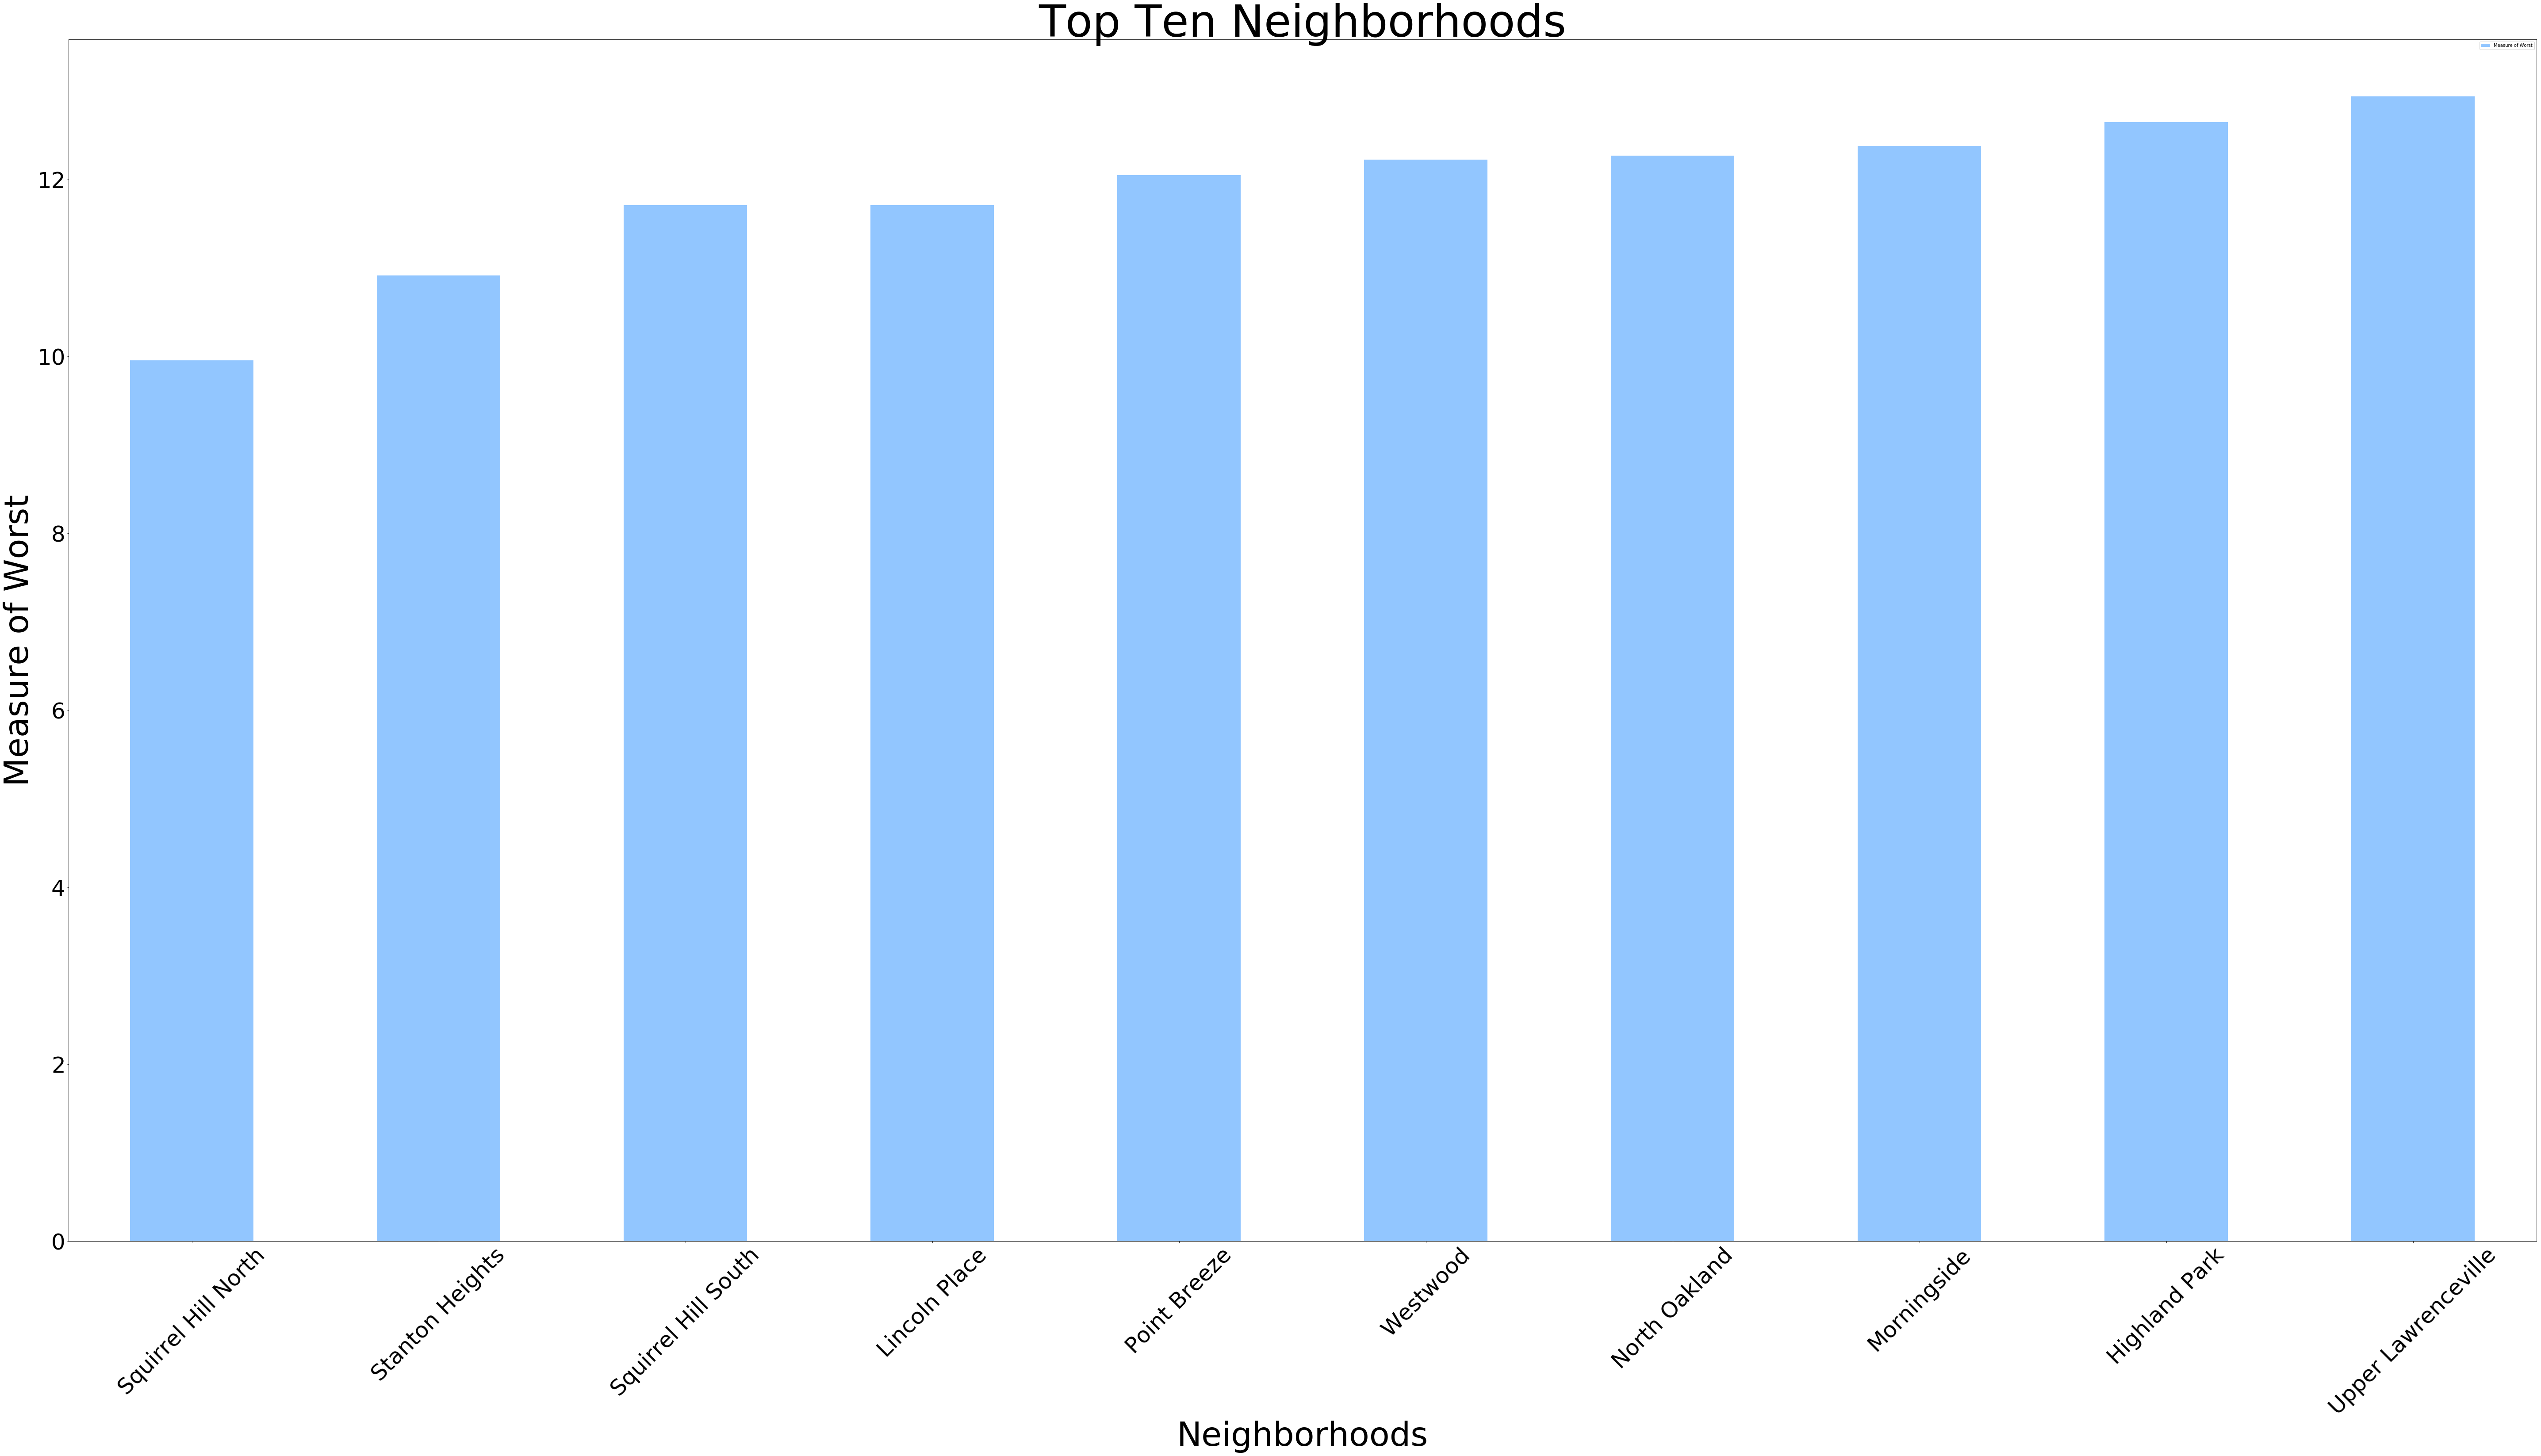

In [12]:
combined_filtered.loc[:,["Measure of Worst"]].sort_values(by=['Measure of Worst'], ascending=True).head(10).plot(kind='bar', fontsize =50, figsize=(100,50), rot=45)
plt.title("Top Ten Neighborhoods", fontsize =100)
plt.xlabel("Neighborhoods", fontsize =75)
plt.ylabel("Measure of Worst", fontsize =75)

#### And the overall worst 10 neighborhoods in Pittsburgh
* Note including neighborhoods that did not meet our population threshold

In [10]:
#Worst 10 Neighborhoods not filtered by population
combined.tail(10)

Offenses  Estimated Population  \
Homewood West                 427.0                 850.0   
Allegheny Center              672.0                1411.0   
South Side Flats             1966.0                6292.0   
Homewood South               1161.0                2276.0   
Central Business District    2168.0                4060.0   
East Allegheny               1259.0                2095.0   
West End                      154.0                 235.0   
North Shore                   477.0                 205.0   
South Shore                   159.0                  12.0   
Chateau                       268.0                   3.0   

                           Offenses per Capita  Citations  \
Homewood West                         0.502353       17.0   
Allegheny Center                      0.476258      118.0   
South Side Flats                      0.312460     2497.0   
Homewood South                        0.510105      126.0   
Central Business District             0.533990      925.0   
East Allegheny                        0.600955      246.0   
West End                              0.655319       11.0   
North Shore                           2.326829      384.0   
South Shore                          13.250000       38.0   
Chateau                              89.333333       45.0   

                           Citations per Capita  Estimate; Total:  \
Homewood West                          0.020000             794.0   
Allegheny Center                       0.083629            1188.0   
South Side Flats                       0.396853            4400.0   
Homewood South                         0.055360            2068.0   
Central Business District              0.227833            2421.0   
East Allegheny                         0.117422            1939.0   
West End                               0.046809             164.0   
North Shore                            1.873171             205.0   
South Shore                            3.166667               8.0   
Chateau                               15.000000               3.0   

                           Estimate; Not enrolled in school  \
Homewood West                                         668.0   
Allegheny Center                                      995.0   
South Side Flats                                     4159.0   
Homewood South                                       1601.0   
Central Business District                            2352.0   
East Allegheny                                       1783.0   
West End                                              164.0   
North Shore                                           193.0   
South Shore                                             8.0   
Chateau                                                 3.0   

                           Ratio not enrolled  Measure of Worst  
Homewood West                        0.841310         59.648392  
Allegheny Center                     0.837542         60.182650  
South Side Flats                     0.945227         60.540957  
Homewood South                       0.774178         61.520338  
Central Business District            0.971499         74.505634  
East Allegheny                       0.919546         75.162049  
West End                             1.000000         77.872340  
North Shore                          0.941463        335.756098  
South Shore                          1.000000       1493.333333  
Chateau                              1.000000       9693.333333

### Although there is not a neighborhood that is clearly better than the rest, based on our weights, the best neighborhood is 
## **Squirrel Hill North**
### And the worst are
## **Chateau** and **Central Buisness District**

How do we feel about it?

Alex: Squirrel Hill winning was not really a shocker; I have been through there many times and it has never even remotely felt sketchy. Central Buisness District - heart of downtown - and Chateau - location of the Rivers Casino - weren't too surprising either.

Dom: Was not surprised about Squirrel Hill at all. Never heard of Chateau so had no feelings on that. Was actually surprised it was not a more familiar neighborhood that was classified as the worst.

Albert: I have not been to many of these neigborhoods but I agree with the results based on what I've seen so far. 